À medida que a dimensionalidade aumenta, o desempenho do classificador aumenta até que o número ideal de recursos seja atingido. Aumentar ainda mais a dimensionalidade sem aumentar o número de amostras de treinamento resulta em uma diminuição no desempenho do classificador.

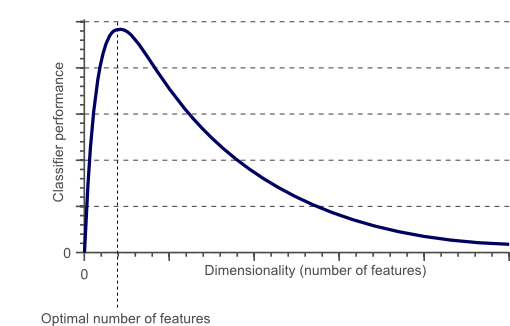

Em outras palavras, se a quantidade de dados de treinamento disponível for fixa, ocorrerá o ajuste excessivo se continuarmos adicionando dimensões. Por outro lado, se continuarmos adicionando dimensões, a quantidade de dados de treinamento precisará crescer exponencialmente rápido para manter a mesma cobertura e evitar ajustes excessivos.

Portanto, as medidas de distância começam a perder sua eficácia para medir a dissimilaridade em espaços altamente dimensionais. Como os classificadores dependem dessas medidas de distância (por exemplo, distância euclidiana, distância de Mahalanobis, distância de Manhattan), a classificação geralmente é mais fácil em espaços de menor dimensão, onde menos recursos são usados ​​para descrever o objeto de interesse. 

# Objetivos

- Se dois parâmetros são altamente correlacionados, então é redundante;
- A remoção de recursos correlatos melhora o desempenho do modelo;
- Comparar os resultados de Classificação usando modelo de ML com os parâmetros selecionados x não-selecionados.

## Download dos Dados
* https://github.com/philipesantos136/Portfolio/tree/master/Feature-Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [3]:
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
import scikitplot as skplt

In [4]:
data = pd.read_csv('santander.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


0    19187
1      813
Name: TARGET, dtype: int64

Conseção de Crédito representam 4.06% Do Dataset.



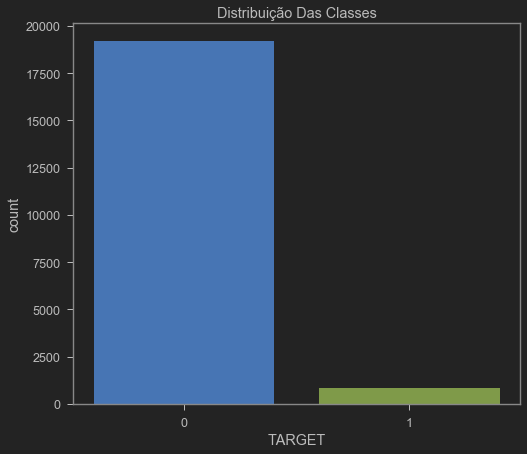

In [5]:
# checando a distribuição da variável alvo
print(data.TARGET.value_counts())
print("\nConseção de Crédito representam {:.2f}% Do Dataset.\n".format((data[data.TARGET == 1].shape[0] / data.shape[0]) * 100))

# plotando gráfico de barras
fig, ax = plt.subplots()
sns.countplot('TARGET', data=data, ax=ax)
ax.set_title('Distribuição Das Classes')
plt.plot()
plt.savefig('original_dist.png')

In [6]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

1    569
0    569
Name: TARGET, dtype: int64


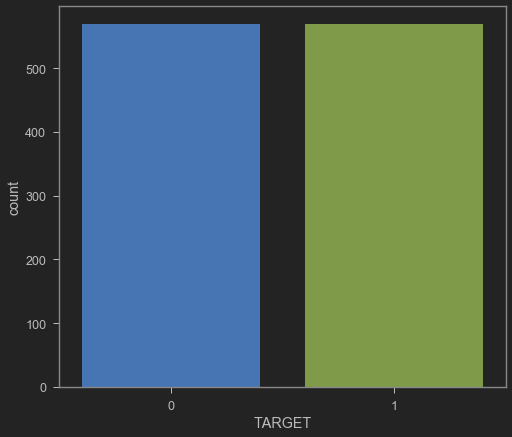

In [8]:
# aplicando o UnderSampler
rus = RandomUnderSampler()
X_rus_train, y_rus_train = rus.fit_sample(X_train, y_train)

# checando o balanceamento das classes
print(pd.Series(y_rus_train).value_counts())

# plotando a nova distribuição das classes
sns_plot = sns.countplot(y_rus_train);
plt.savefig("balanced.png")

### Remoção de parâmetros constantes

In [9]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_rus_train)

VarianceThreshold(threshold=0)

In [10]:
#Parâmetros constantes
constant_filter.get_support().sum()

225

In [11]:
#Removendo os parâmetros constantes
X_train_filter = constant_filter.transform(X_rus_train)
X_test_filter = constant_filter.transform(X_test)

X_train_filter.shape, X_test_filter.shape, X_train.shape

((1138, 225), (6000, 225), (14000, 370))

## Remoção de Parâmetros Semi-Constantes

In [12]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [13]:
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [14]:
#Parâmetros Semi-constantes
quasi_constant_filter.get_support().sum()

199

In [15]:
#Removendo os parâmetros Semi-constantes
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)

X_train_quasi_filter.shape, X_test_quasi_filter.shape

((1138, 199), (6000, 199))

## Parâmetros Duplicados

In [16]:
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [17]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [18]:
X_train_T.shape, X_test_T.shape

((199, 1138), (199, 6000))

In [19]:
#Duplicados
X_train_T.duplicated().sum()

24

In [20]:
duplicated_features = X_train_T.duplicated()

In [21]:
#Selecionando os Parâmetros que devem ficar ou não
features_to_keep = [not index for index in duplicated_features]

In [22]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [23]:
X_train_unique.shape, X_train.shape

((1138, 175), (14000, 370))

## Correlação de Pearson

In [24]:
corrmat = X_train_unique.corr()

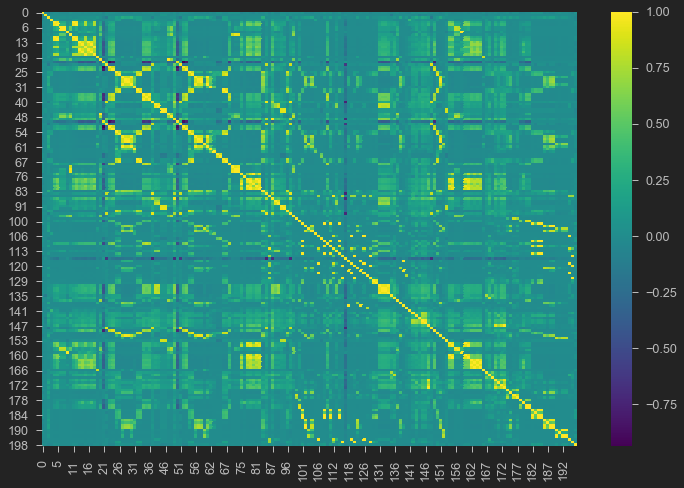

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, cmap='viridis')

In [26]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [27]:
corr_features = get_correlation(X_train_unique, 0.85)
len(corr_features)

96

In [28]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features, axis = 1)
X_train_uncorr.shape, X_test_uncorr.shape

((1138, 79), (6000, 79))

## Criando Modelo e comparando resultados

In [29]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [35]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_rus_train, y_test)

Accuracy on test set: 
0.7546666666666667
Wall time: 530 ms


In [36]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9583333333333334
Wall time: 1.72 s
